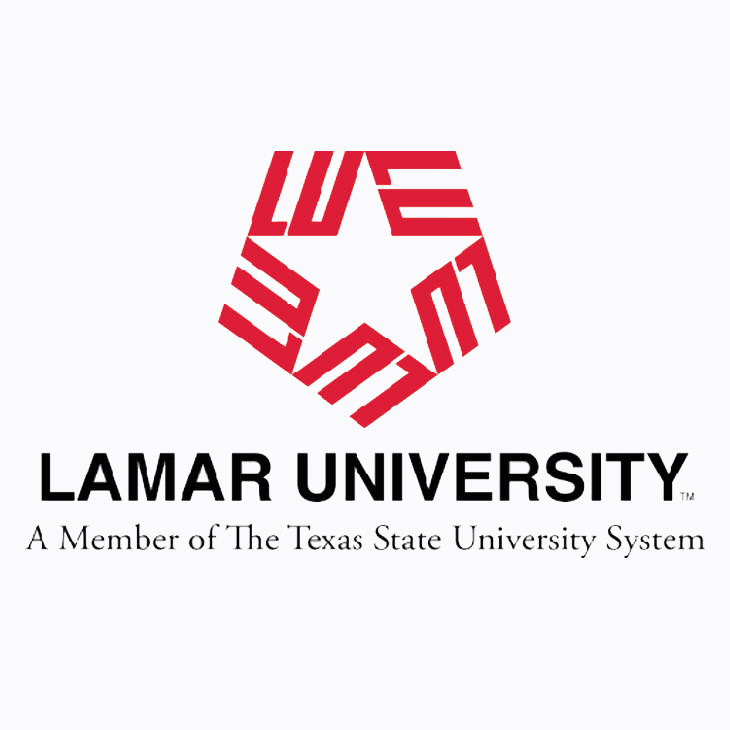

<table border="1" align="center">
    <tr style="background-color:#ADD8E6 ;">
        <td>
            <h1><font color='red'><center>Prediction of ozone in houston</center></font></h1>
        </td>
    </tr>
    <tr style="background-color:#ADD8E6 ;">
        <td>
        <h3><font color='blue'> <center> Vandan B Gadhiya </center> </font></h3>
        <h3><font color='blue'> <center> Azeez Asiwaju </center> </font></h3>
        <h3><font color='blue'> <center> Azucena Lopez </center> </font></h3>
        <h3><font color='blue'> <center> MD Mahbubur Rahman </center> </font></h3>
        </td>
    </tr>    
    </table>

<h2><font color="red"> Load Libraries </font> </h2>

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

<h2><font color="red"> Change working directory and Load the excel file as dataframe</font> </h2> 

In [2]:
os.chdir('C:/Users/keyur/Downloads') # set working directory
fname = 'O3_Var.xlsx' 
O3_var_a = pd.read_excel(fname) #load the data file as pandas dataframe
O3_var_a.head(5)

,Date,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
0,2022-01-01,NaN,22.0,28.0,21.0,28.0,26.0,30.0,27.0,76.0,57.0,12.4,0.00,0.002
1,2022-01-02,NaN,23.0,34.0,32.0,30.0,30.0,30.0,30.0,50.0,55.9,20.3,0.01,0.458
2,2022-01-03,30.0,26.0,36.0,30.0,35.0,35.0,NaN,29.0,43.0,44.0,5.0,0.00,0.228
3,2022-01-04,NaN,32.0,43.0,30.0,38.0,39.0,39.0,42.0,51.0,59.8,6.9,0.00,0.087
4,2022-01-05,28.0,31.0,42.0,30.0,38.0,40.0,36.0,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Set date as index </font> </h2> 

In [3]:
O3_var = O3_var_a.set_index('Date') #set date as index for dataframe
O3_var.head(5)

,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
Date,,,,,,,,,,,,,
2022-01-01,NaN,22.0,28.0,21.0,28.0,26.0,30.0,27.0,76.0,57.0,12.4,0.00,0.002
2022-01-02,NaN,23.0,34.0,32.0,30.0,30.0,30.0,30.0,50.0,55.9,20.3,0.01,0.458
2022-01-03,30.0,26.0,36.0,30.0,35.0,35.0,NaN,29.0,43.0,44.0,5.0,0.00,0.228
2022-01-04,NaN,32.0,43.0,30.0,38.0,39.0,39.0,42.0,51.0,59.8,6.9,0.00,0.087
2022-01-05,28.0,31.0,42.0,30.0,38.0,40.0,36.0,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Replace the No values with mean of column in dataframe </font> </h2> 

In [4]:
O3_var.columns = O3_var.columns.to_series().apply(lambda x: x.strip()) #remove whitespaces from column names 
c = ['Clinton C403/C304/AH113','Houston Westhollow C410/C3003','West Houston C554','La Porte Sylvan Beach C556','Mercer Arboretum C557','Meyer Park C561','Houston Aldine C8/AF108/X1502','UH Moody Tower C695','temp','humidity','wind speed','radiation']
O3_var[c] = O3_var[c].fillna(O3_var[c].mean()) #fill the no values with the mean of that perticular column 
O3_var.head(5)

,Clinton C403/C304/AH113,Houston Westhollow C410/C3003,West Houston C554,La Porte Sylvan Beach C556,Mercer Arboretum C557,Meyer Park C561,Houston Aldine C8/AF108/X1502,UH Moody Tower C695,temp,humidity,wind speed,precipatation,radiation
Date,,,,,,,,,,,,,
2022-01-01,37.126344,22.0,28.0,21.0,28.0,26.0,30.000000,27.0,76.0,57.0,12.4,0.00,0.002
2022-01-02,37.126344,23.0,34.0,32.0,30.0,30.0,30.000000,30.0,50.0,55.9,20.3,0.01,0.458
2022-01-03,30.000000,26.0,36.0,30.0,35.0,35.0,35.133333,29.0,43.0,44.0,5.0,0.00,0.228
2022-01-04,37.126344,32.0,43.0,30.0,38.0,39.0,39.000000,42.0,51.0,59.8,6.9,0.00,0.087
2022-01-05,28.000000,31.0,42.0,30.0,38.0,40.0,36.000000,37.0,62.0,76.2,5.5,0.00,0.300


<h2><font color="red"> Select relevant data for one site and Get summary </font> </h2> 

In [5]:
O3_s8 = O3_var[['UH Moody Tower C695','temp','humidity','wind speed','precipatation','radiation']] #select data columns for relevant site 
O3_s8.rename(columns = {'UH Moody Tower C695':'ozone'}, inplace = True) #replace the site name by ozone
O3_s8.describe() #get summary of ozone data 

,ozone,temp,humidity,wind speed,precipatation,radiation
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,38.488722,69.345324,67.654415,9.215274,0.117613,0.276451
std,12.743485,14.960896,13.531606,3.974844,0.419777,0.129748
min,6.000000,24.000000,23.000000,0.000000,0.000000,0.001000
25%,30.000000,58.000000,60.050000,6.200000,0.000000,0.180500
50%,37.000000,72.000000,69.000000,8.300000,0.000000,0.276451
75%,47.000000,83.000000,76.700000,11.900000,0.010000,0.380500
max,83.000000,94.000000,97.400000,26.000000,4.050000,0.609000


<h2><font color="red"> Plot correlation matrix </font> </h2> 

In [6]:
corr_s8= O3_s8.corr() #get correlation matrix 
corr_s8

,ozone,temp,humidity,wind speed,precipatation,radiation
ozone,1.000000,0.343769,-0.403787,-0.357077,-0.177829,0.520375
temp,0.343769,1.000000,0.155782,-0.156617,-0.031757,0.469185
humidity,-0.403787,0.155782,1.000000,0.190850,0.255851,-0.435051
wind speed,-0.357077,-0.156617,0.190850,1.000000,0.139356,-0.116299
precipatation,-0.177829,-0.031757,0.255851,0.139356,1.000000,-0.229734
radiation,0.520375,0.469185,-0.435051,-0.116299,-0.229734,1.000000


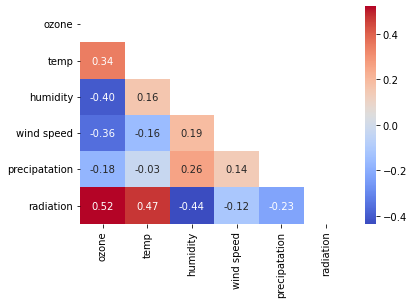

In [7]:
mask = np.triu(np.ones_like(corr_s8)) #mask the upper side table 
sns.heatmap(corr_s8, mask=mask, cmap='coolwarm', annot=True, fmt='.2f') #plot heatmap of the correlation matrix
plt.show()

<h1><font color="red"> Regression model 1 </font> </h1> 

<h3><font color="red"> Develop model 1 for temprature and radiation </font> </h3> 

In [8]:
X = O3_s8[['temp','radiation']].values #define independent(x) variables
y = O3_s8['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [10]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     66.69
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.49e-25
Time:                        01:47:17   Log-Likelihood:                -1267.7
No. Observations:                 335   AIC:                             2541.
Df Residuals:                     332   BIC:                             2553.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2826      2.726      6.340      0.000      11.920      22.645
x1             0.1312      0.044      2.971      0.003       0.044       0.218
x2            43.3343      5.209      8.319      0.000      33.087      53.582
==============================================================================
Omnibus:                       14.364   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.920
Skew:                           0.359   Prob(JB):                     7.79e-05
Kurtosis:                       3.917   Cond. No.                         629.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [12]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred  

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [13]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 127.43239432636872


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

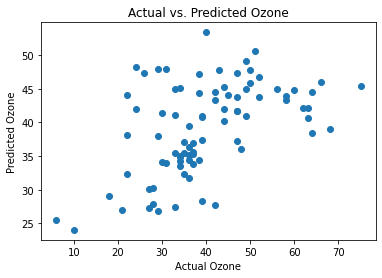

In [14]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [15]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.11960077561061944, 0.00792605947363559)

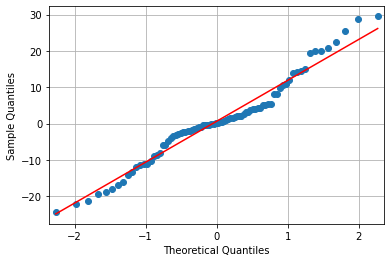

In [16]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [17]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(19.07280321161123,
 0.0393476558530298,
 1.9439423691821012,
 0.038914102332648776)

<h1><font color="red"> Regression model 2 </font> </h1> 

<h3><font color="red"> Develop model 2 for radiation and precipitation </font> </h3> 

In [18]:
X = O3_s8[['precipatation','radiation']].values #define independent(x) variables
y = O3_s8['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [20]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     61.65
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.71e-23
Time:                        01:47:20   Log-Likelihood:                -1271.4
No. Observations:                 335   AIC:                             2549.
Df Residuals:                     332   BIC:                             2560.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8517      1.468     16.926      0.000      21.963      27.740
x1            -1.5956      1.332     -1.198      0.232      -4.215       1.024
x2            49.5017      4.739     10.445      0.000      40.179      58.824
==============================================================================
Omnibus:                       19.836   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.732
Skew:                           0.447   Prob(JB):                     9.51e-07
Kurtosis:                       4.090   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [22]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [23]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 124.41513374505476


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

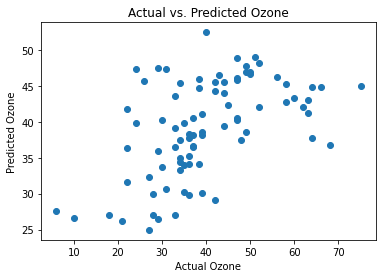

In [24]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [25]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.1098755387733712, 0.02164714702240284)

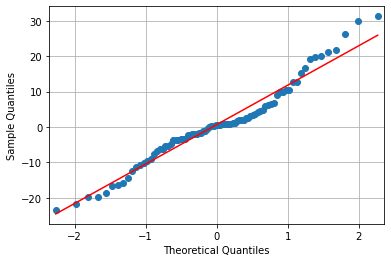

In [26]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [27]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(20.828457674115445,
 0.022322012222888255,
 2.1347456620079113,
 0.02162815873433443)

<h1><font color="red"> Regression model 3 </font> </h1> 

<h3><font color="red"> Develop model 3 for wind speed and humidity </font> </h3> 

In [28]:
X = O3_s8[['wind speed','humidity']].values #define independent(x) variables
y = O3_s8['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [30]:
model = sm.OLS(y_train, X_train).fit() #fit the model with training data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     51.02
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.78e-20
Time:                        01:47:24   Log-Likelihood:                -1279.4
No. Observations:                 335   AIC:                             2565.
Df Residuals:                     332   BIC:                             2576.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.9862      3.250     20.917      0.000      61.592      74.380
x1            -0.9162      0.153     -5.991      0.000      -1.217      -0.615
x2            -0.3139      0.046     -6.752      0.000      -0.405      -0.222
==============================================================================
Omnibus:                        6.979   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.785
Skew:                           0.318   Prob(JB):                       0.0336
Kurtosis:                       3.284   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [32]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [33]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 126.20756830117588


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

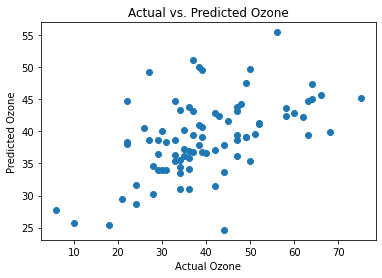

In [34]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [35]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.0929945121486011, 0.09402281025830864)

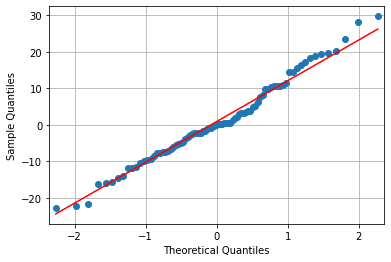

In [36]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [37]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(12.810874420021944,
 0.2344391385441593,
 1.2803354414340924,
 0.24032060956520956)

<h1><font color="red"> Regression model 4 </font> </h1> 

<h3><font color="red"> Develop model 4 for temprature, radiation, precipatation, wind speed and humidity </font> </h3> 

In [38]:
X = O3_s8[['temp','radiation','precipatation','wind speed','humidity']].values #define independent(x) variables
y = O3_s8['ozone'].values #define dependent(y) variables

<h2><font color="red"> Split the data into training and testing </font> </h2> 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # split data into testing and training
X_train = sm.add_constant(X_train) # adding constant

<h2><font color="red"> Fitting the model and get summary </font> </h2> 

In [40]:
model = sm.OLS(y_train, X_train).fit() #fit the model with tarining data
model.summary() # getting summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     45.82
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           7.55e-36
Time:                        01:47:28   Log-Likelihood:                -1235.8
No. Observations:                 335   AIC:                             2484.
Df Residuals:                     329   BIC:                             2506.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5613      3.992     10.411      0.000      33.708      49.415
x1             0.2274      0.047      4.810      0.000       0.134       0.320
x2            21.7176      6.081      3.572      0.000       9.756      33.680
x3            -0.3660      1.227     -0.298      0.766      -2.779       2.047
x4            -0.6959      0.139     -5.006      0.000      -0.969      -0.422
x5            -0.2722      0.053     -5.112      0.000      -0.377      -0.167
==============================================================================
Omnibus:                        5.417   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.172
Skew:                           0.268   Prob(JB):                       0.0753
Kurtosis:                       3.290   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
pred = model.fittedvalues.copy() # make a copy of fitted values in model
err = y_train - pred # define error 

<h2><font color="red"> Prediction for test data </font> </h2> 

In [42]:
X_test = sm.add_constant(X_test) # adding constant for test data
y_pred = model.predict(X_test) # making prediction for test data
err_test = y_test - y_pred 

<h2><font color="red"> Evaluate the model on test set </font> </h2> 

In [43]:
mse = np.mean((y_test - y_pred)**2) # get mean sqaure error of test and predicted data
print("Mean Squared Error:", mse) # print the value of mean square error  

Mean Squared Error: 102.14484000562288


<h2><font color="red"> Observed-Predicted plot </font> </h2> 

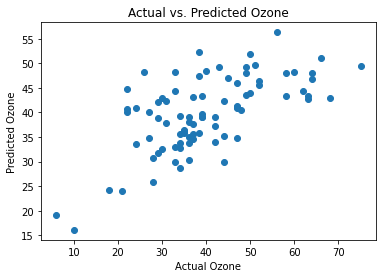

In [44]:
#plot the graph of observed versus predicted ozone
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ozone")
plt.ylabel("Predicted Ozone")
plt.title("Actual vs. Predicted Ozone")
plt.show()

<h2><font color="red"> Breusch Pagan Test for homoskedasticity </font> </h2> 

In [45]:
BP = sm.stats.diagnostic.het_breuschpagan(err_test,X_test) # homoskedasticity test

<h2><font color="red"> Tests of Normality </font> </h2> 

(0.07944372499608204, 0.25510997500586197)

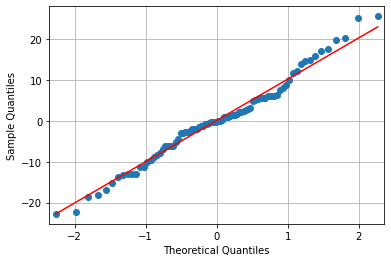

In [46]:
# plot the graph of error distribution
sm.qqplot(err_test,line='s')  
plt.grid()
sm.stats.diagnostic.kstest_normal(err_test, dist='norm')

<h2><font color="red"> Autocorrelation testing </font> </h2> 

In [47]:
sm.stats.diagnostic.acorr_breusch_godfrey(model) #perform the auotocorrelation test

(14.702969216596367,
 0.14327214488600773,
 1.4643430095566368,
 0.15156283263239628)